# 데이터 전처리

- 데이터 전처리
    - 태양광 발전량이 0인 시간은 분석에서 제외V
    - 결측치 처리할 것
    - 풍위 수치로 저리V
    <br><br>
- 일조량 분포파악하기
    - 태양광 발전량의 주기성에서 기인한 추세확인
    - 외적 요인이 개입했다는 판단하에 값을 보정
    <br><br>
- 상관관계 재분석
    - 피처엔지니어링에 도움
    <br><br>
- PCA
    - 설명력을 위함
    <br><br>
- 편차를 예측
    - 모든 시간대에 대한 예측을 하는 것에 무리가 있다면 편차를 예측하는 것도 방법
    - LSTM으로 정해진 셀에 맞는 예측을 하는 것도 좋을 것 같음(추후!)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('merged_pv_data.csv',encoding='cp949',index_col='Unnamed: 0')

In [3]:
df.drop(['운형(운형약어)'],axis=1,inplace=True)

## 연/월/일/시간

In [4]:
# df["날짜"] = pd.to_datetime(df["날짜"])

# # df_new 데이터프레임에 month와 hour 컬럼 추가
# df['year'] = df['날짜'].dt.year
# df['month'] = df['날짜'].dt.month
# df['hour'] = df['날짜'].dt.hour

# # 결측값 대체를 위해 groupby와 transform을 사용하여 월별, 시간별 평균 계산
# df_filled = df.fillna(df.groupby(['year','month', 'hour']).transform('mean'))

# # 결측값이 있는지 확인
# print(df_filled.isnull().sum())

## 데이터 범위 제한
- 태양광 발전이 가능한 시간(6h~20h)만으로 제한

In [5]:
df["날짜"] = pd.to_datetime(df["날짜"])

# 6:00 ~ 20:00 범위의 데이터만 추출하여 새로운 데이터프레임 생성
df_new = df.loc[(df["날짜"].dt.hour >= 6) & (df["날짜"].dt.hour <= 20)]

In [6]:
# 결과 확인
df_new

,날짜,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),발전량,PM10,PM2.5,O3,이산화질소,일산화질소,아황산가스
5,2013-01-01 06:00:00,-2.2,0.0,4.5,160.0,95.0,5.0,-2.8,1013.8,1018.7,...,3.0,3.7,4.5,0.00,26.0,23.0,0.007,0.006,NaN,0.004
6,2013-01-01 07:00:00,-1.7,NaN,5.0,160.0,95.0,5.1,-2.4,1013.8,1018.6,...,3.0,3.7,4.5,0.00,26.0,NaN,0.006,0.010,NaN,0.004
7,2013-01-01 08:00:00,-0.4,NaN,3.2,180.0,89.0,5.3,-1.9,1014.1,1018.9,...,2.9,3.7,4.5,0.00,30.0,24.0,0.006,0.011,NaN,0.004
8,2013-01-01 09:00:00,2.6,0.0,6.0,290.0,91.0,6.7,1.2,1014.8,1019.6,...,2.9,3.7,4.5,20.16,28.0,23.0,0.005,0.010,NaN,0.004
9,2013-01-01 10:00:00,4.2,NaN,5.8,250.0,82.0,6.7,1.3,1015.2,1019.9,...,2.9,3.7,4.5,106.80,29.0,27.0,0.007,0.006,NaN,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87439,2022-12-31 16:00:00,4.9,NaN,5.4,320.0,51.0,4.4,-4.4,1025.5,1031.1,...,5.0,4.7,5.0,428.16,28.0,18.0,0.039,0.009,0.42,0.002
87440,2022-12-31 17:00:00,4.3,NaN,5.0,250.0,53.0,4.4,-4.4,1025.4,1031.0,...,4.9,4.8,5.0,53.64,26.0,20.0,0.035,0.013,0.45,0.002
87441,2022-12-31 18:00:00,3.7,NaN,2.8,320.0,57.0,4.5,-4.0,1025.5,1031.1,...,4.7,4.8,5.0,5.76,32.0,19.0,0.029,0.018,0.47,0.002
87442,2022-12-31 19:00:00,3.2,NaN,2.3,320.0,60.0,4.6,-3.8,1026.1,1031.8,...,4.6,4.8,5.1,0.00,29.0,16.0,0.027,0.016,0.50,0.003


In [7]:
df_new=df_new.reset_index()

In [8]:
df_new.drop('index',axis=1,inplace=True)

### 일사량 데이터 결측값 확인

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54661 entries, 0 to 54660
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   날짜             54661 non-null  datetime64[ns]
 1   기온(°C)         54658 non-null  float64       
 2   강수량(mm)        5213 non-null   float64       
 3   풍속(m/s)        54642 non-null  float64       
 4   풍향(16방위)       54233 non-null  float64       
 5   습도(%)          54387 non-null  float64       
 6   증기압(hPa)       54644 non-null  float64       
 7   이슬점온도(°C)      54624 non-null  float64       
 8   현지기압(hPa)      54631 non-null  float64       
 9   해면기압(hPa)      54661 non-null  float64       
 10  일조(hr)         47636 non-null  float64       
 11  일사(MJ/m2)      47853 non-null  float64       
 12  전운량(10분위)      50880 non-null  float64       
 13  중하층운량(10분위)    52328 non-null  float64       
 14  최저운고(100m )    32321 non-null  float64       
 15  시정(10m)        5323

In [10]:
df_new.isnull().sum()

날짜                   0
기온(°C)               3
강수량(mm)          49448
풍속(m/s)             19
풍향(16방위)           428
습도(%)              274
증기압(hPa)            17
이슬점온도(°C)           37
현지기압(hPa)           30
해면기압(hPa)            0
일조(hr)            7025
일사(MJ/m2)         6808
전운량(10분위)         3781
중하층운량(10분위)       2333
최저운고(100m )      22340
시정(10m)           1424
지면온도(°C)            25
5cm 지중온도(°C)       108
10cm 지중온도(°C)       62
20cm 지중온도(°C)       20
30cm 지중온도(°C)       58
발전량                  3
PM10              7081
PM2.5             9744
O3                2370
이산화질소             2324
일산화질소            45058
아황산가스             2894
dtype: int64

In [11]:
# 일사량은 확인 결과 NAN인 값은 전부 0으로 판명
df_new['일사(MJ/m2)'].fillna(0.0, inplace=True)

In [12]:
# 일사량이 0이면 일조량도 0.
cond = (df_new['일조(hr)'].isna()) & (df_new['일사(MJ/m2)'] == 0)
df_new.loc[cond, '일조(hr)'] = 0

In [13]:
df_new.isnull().sum()

날짜                   0
기온(°C)               3
강수량(mm)          49448
풍속(m/s)             19
풍향(16방위)           428
습도(%)              274
증기압(hPa)            17
이슬점온도(°C)           37
현지기압(hPa)           30
해면기압(hPa)            0
일조(hr)             222
일사(MJ/m2)            0
전운량(10분위)         3781
중하층운량(10분위)       2333
최저운고(100m )      22340
시정(10m)           1424
지면온도(°C)            25
5cm 지중온도(°C)       108
10cm 지중온도(°C)       62
20cm 지중온도(°C)       20
30cm 지중온도(°C)       58
발전량                  3
PM10              7081
PM2.5             9744
O3                2370
이산화질소             2324
일산화질소            45058
아황산가스             2894
dtype: int64

## 데이터 타입 변환
- 풍향을 16방위 기준으로 범주형으로 

In [14]:
df_new['풍향(16방위)'].unique()

array([160., 180., 290., 250., 320., 340.,   0.,  20.,  50., 360.,  70.,
        90., 110., 140., 200., 230., 270.,  nan,  34.])

In [15]:
df_new['풍향(16방위)']=df_new['풍향(16방위)']/22.5
df_new['풍향(16방위)']=round(df_new['풍향(16방위)'],0)

In [16]:
df_new['풍향(16방위)'] = df_new['풍향(16방위)'].astype('str')

In [17]:
df_new.loc[df_new['풍향(16방위)'] == '15.0', '풍향(16방위)'] = '북북서'
df_new.loc[df_new['풍향(16방위)'] == '14.0', '풍향(16방위)'] = '북서'
df_new.loc[df_new['풍향(16방위)'] == '13.0', '풍향(16방위)'] = '서북서'
df_new.loc[df_new['풍향(16방위)'] == '12.0', '풍향(16방위)'] = '서'
df_new.loc[df_new['풍향(16방위)'] == '11.0', '풍향(16방위)'] = '서남서'
df_new.loc[df_new['풍향(16방위)'] == '10.0', '풍향(16방위)'] = '남서'
df_new.loc[df_new['풍향(16방위)'] == '9.0', '풍향(16방위)'] = '남남서'
df_new.loc[df_new['풍향(16방위)'] == '8.0', '풍향(16방위)'] = '남'
df_new.loc[df_new['풍향(16방위)'] == '7.0', '풍향(16방위)'] = '남남동'
df_new.loc[df_new['풍향(16방위)'] == '6.0', '풍향(16방위)'] = '남동'
df_new.loc[df_new['풍향(16방위)'] == '5.0', '풍향(16방위)'] = '동남동'
df_new.loc[df_new['풍향(16방위)'] == '4.0', '풍향(16방위)'] = '동'
df_new.loc[df_new['풍향(16방위)'] == '3.0', '풍향(16방위)'] = '동북동'
df_new.loc[df_new['풍향(16방위)'] == '2.0', '풍향(16방위)'] = '북동'
df_new.loc[df_new['풍향(16방위)'] == '1.0', '풍향(16방위)'] = '북북동'
df_new.loc[df_new['풍향(16방위)'] == '0.0', '풍향(16방위)'] = '북'

## 범주형 데이터 인코딩
- 범주형으로 나눈 데이터를 원-핫 인코딩

In [18]:
wind_direction_dummies = pd.get_dummies(df_new['풍향(16방위)'], prefix='풍향(16방위)')
df_new = pd.concat([df_new, wind_direction_dummies], axis=1)

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54661 entries, 0 to 54660
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   날짜             54661 non-null  datetime64[ns]
 1   기온(°C)         54658 non-null  float64       
 2   강수량(mm)        5213 non-null   float64       
 3   풍속(m/s)        54642 non-null  float64       
 4   풍향(16방위)       54661 non-null  object        
 5   습도(%)          54387 non-null  float64       
 6   증기압(hPa)       54644 non-null  float64       
 7   이슬점온도(°C)      54624 non-null  float64       
 8   현지기압(hPa)      54631 non-null  float64       
 9   해면기압(hPa)      54661 non-null  float64       
 10  일조(hr)         54439 non-null  float64       
 11  일사(MJ/m2)      54661 non-null  float64       
 12  전운량(10분위)      50880 non-null  float64       
 13  중하층운량(10분위)    52328 non-null  float64       
 14  최저운고(100m )    32321 non-null  float64       
 15  시정(10m)        5323

In [20]:
df_new.drop(['풍향(16방위)_16.0','풍향(16방위)_nan','풍향(16방위)'],axis=1,inplace=True)

In [21]:
df_new.columns

Index(['날짜', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', '발전량', 'PM10',
       'PM2.5', 'O3', '이산화질소', '일산화질소', '아황산가스', '풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서'],
      dtype='object')

# 결측값 처리

In [22]:
# 지수거리가중평균
N = 7
cols = [col for col in df_new.columns if col not in ['날짜','풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서','운형(운형약어)','강수량(mm)','일산화질소']]
for col in cols:
    tmp2 = df_new[col].ewm(alpha=2/(N+1), adjust=True, min_periods=1).mean()
    idx = df_new[df_new[col].isna()].index
    for k in idx:
        df_new.loc[k, col] = tmp2.loc[k]


In [23]:
# ### 이런 방식은 약간 위험하긴함 ###


# # df_new 데이터프레임에 month와 hour 컬럼 추가
# df_new['year'] = df_new['날짜'].dt.year
# df_new['month'] = df_new['날짜'].dt.month
# df_new['hour'] = df_new['날짜'].dt.hour

# # 결측값 대체를 위해 groupby와 transform을 사용하여 월별, 시간별 평균 계산
# df_filled = df_new.fillna(df_new.groupby(['year','month', 'hour']).transform('mean'))

# # 결측값이 있는지 확인
# print(df_filled.isnull().sum())

## csv 파일 보면서 판단

In [ ]:
df_find = df_new[np.isnan(df_new['PM10'])]

In [ ]:
df_filled.to_csv('df_filled.csv',encoding='cp949')

In [ ]:
# df_no_nan = df_new.dropna(subset=['전운량(10분위)'])

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Correlation Heatmap'}>

C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


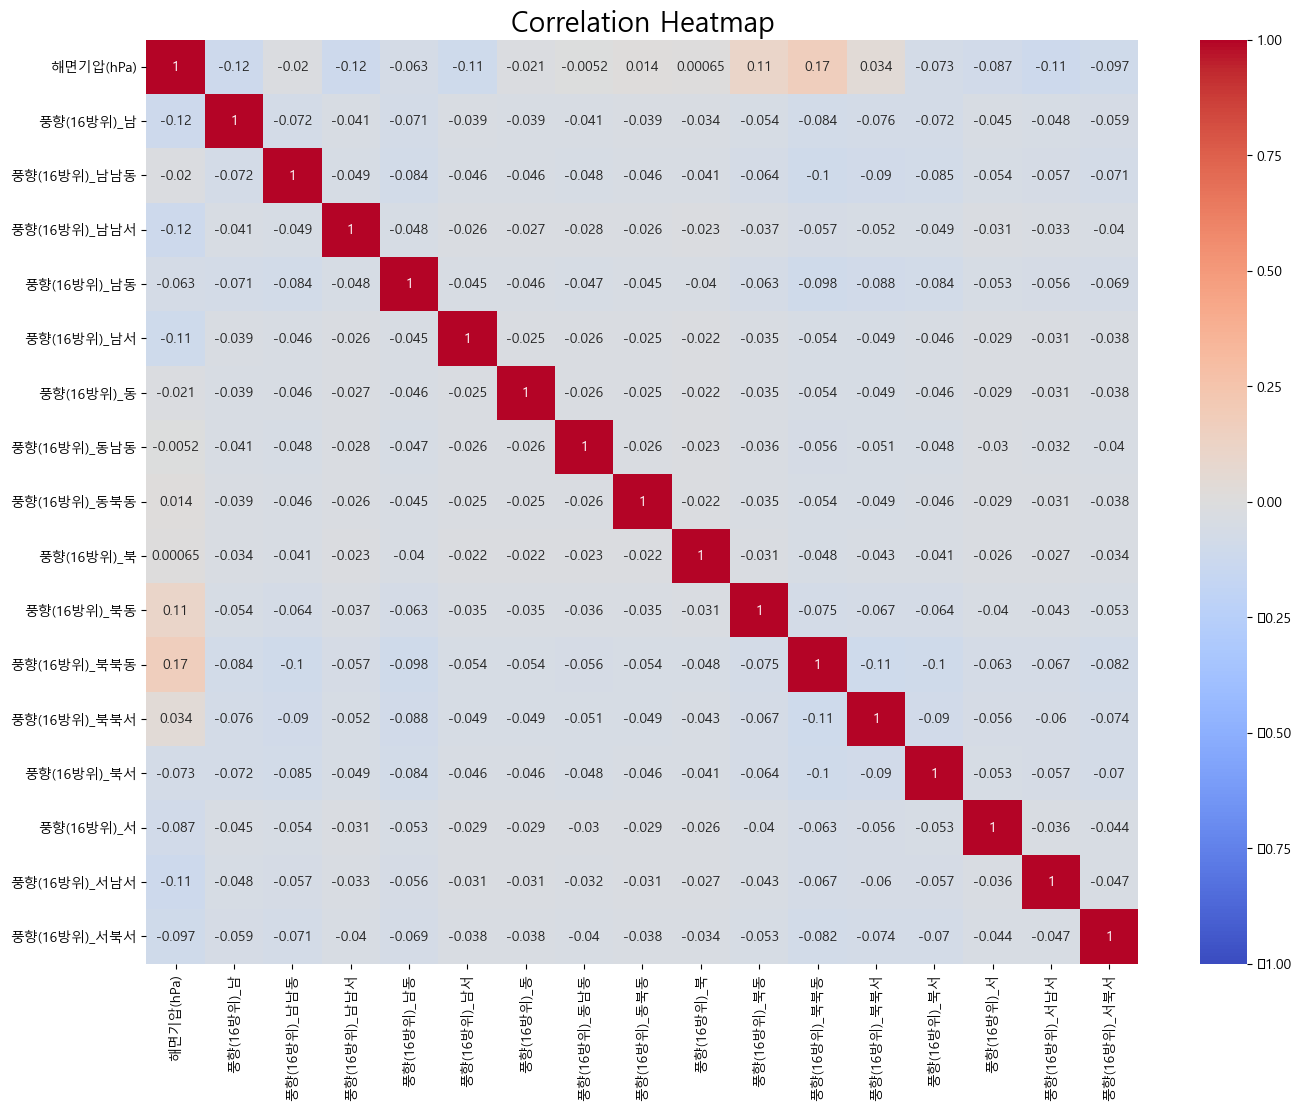

In [25]:
plt.rc('font', family='Malgun Gothic')

selected_features = ['해면기압(hPa)', '풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서']
df_new_selected = df_new[selected_features]


corr = df_new_selected.corr()
plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap', fontsize=20)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [26]:
df_new.columns

Index(['날짜', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)', '발전량', 'PM10',
       'PM2.5', 'O3', '이산화질소', '일산화질소', '아황산가스', '풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서'],
      dtype='object')

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Correlation Heatmap'}>

C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


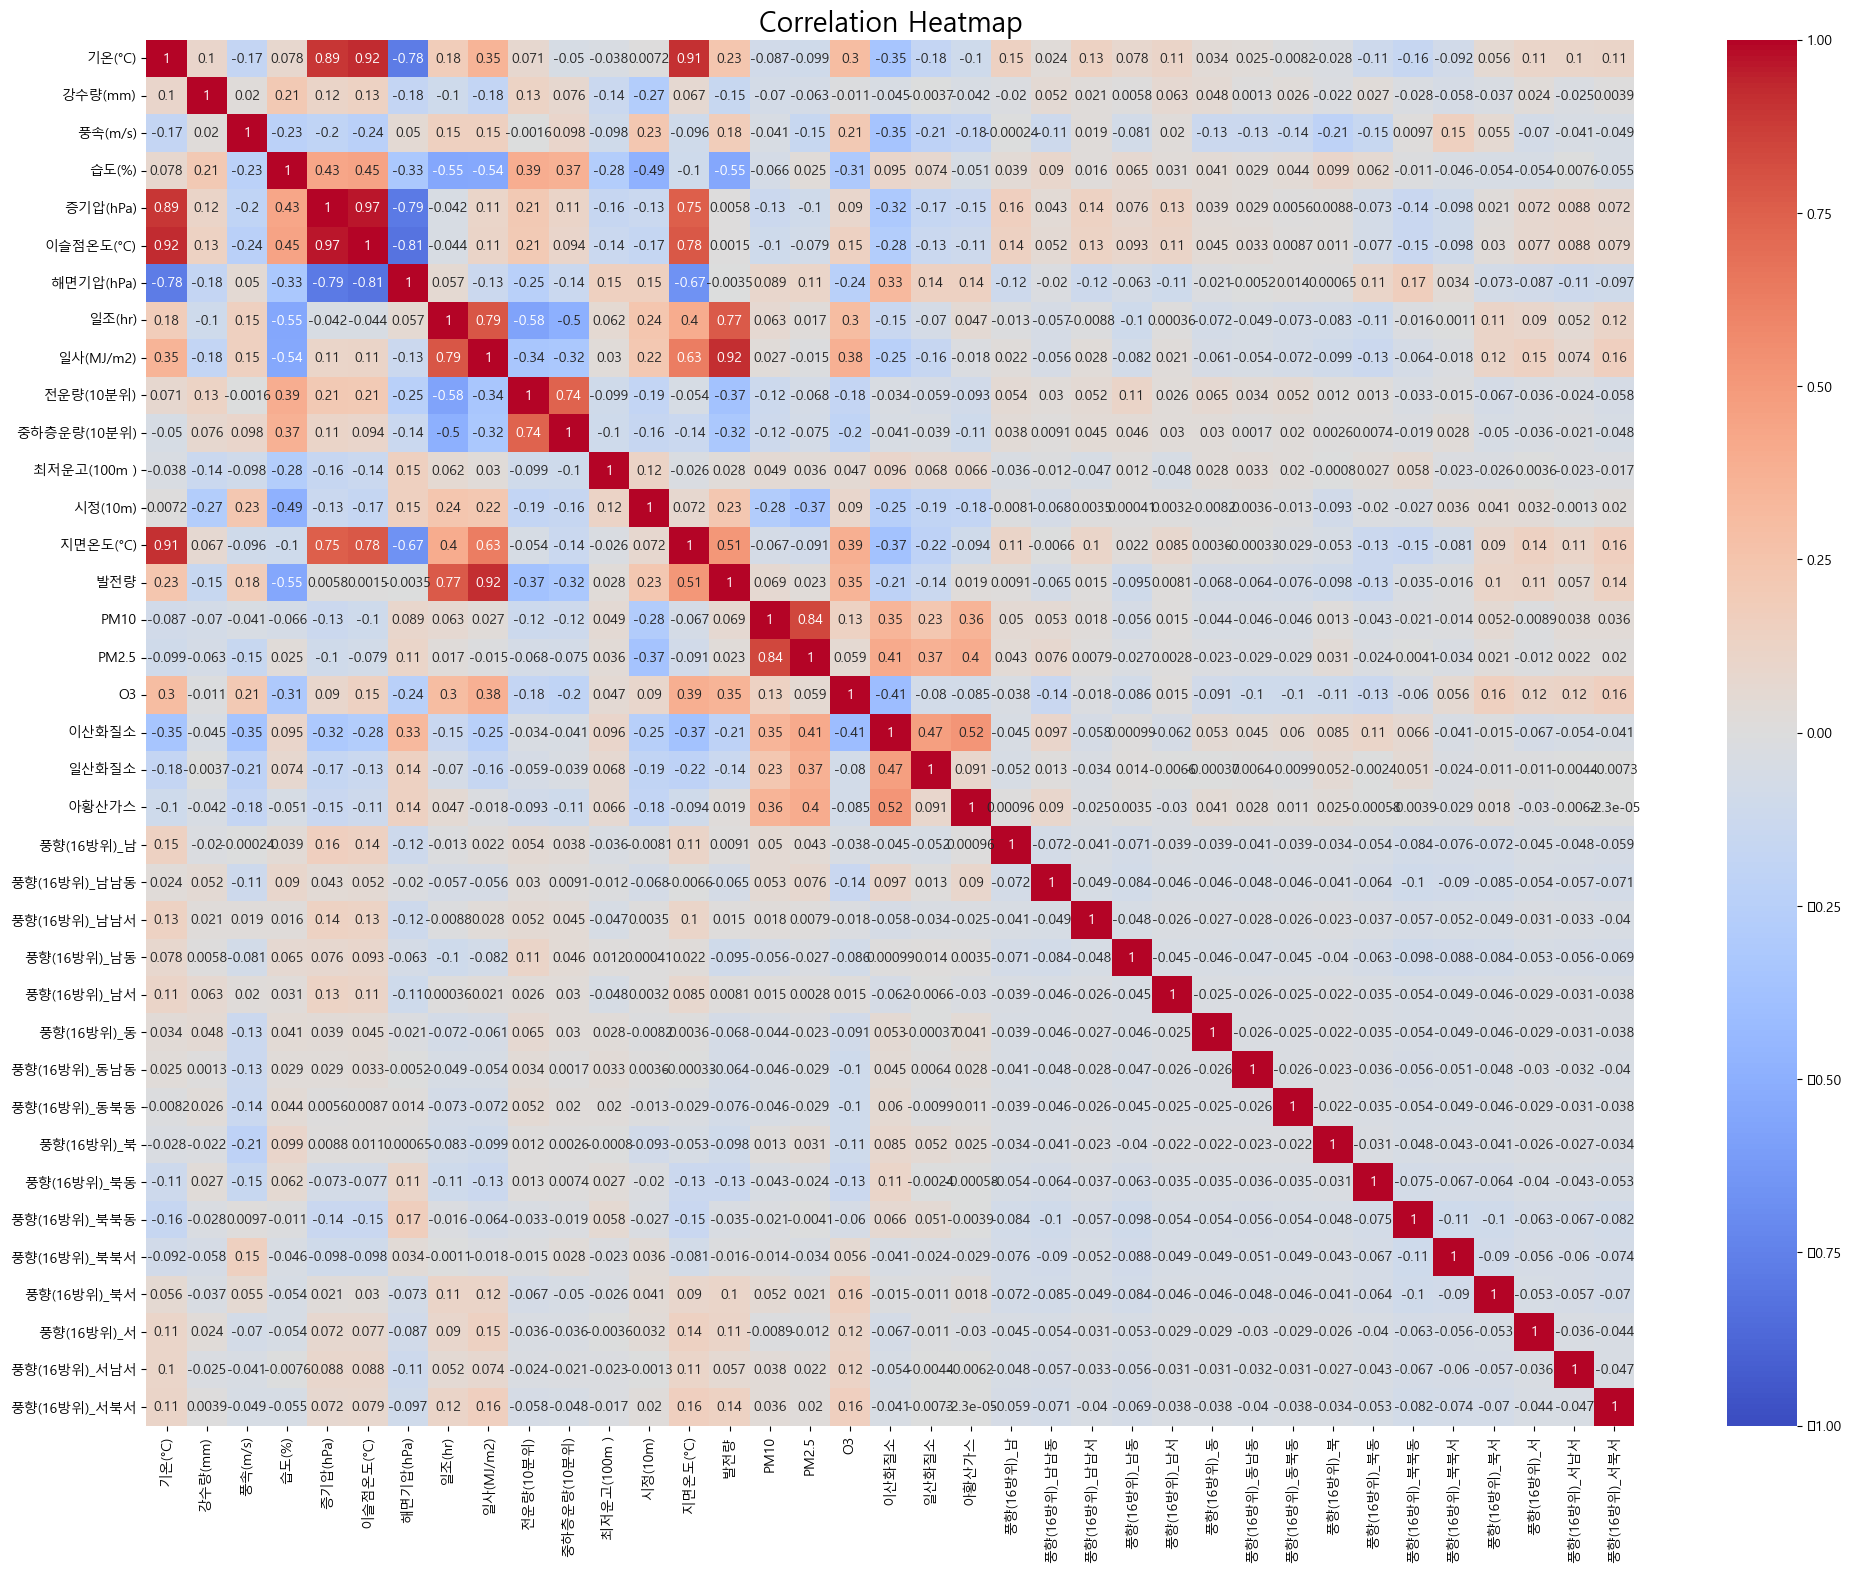

In [28]:
plt.rc('font', family='Malgun Gothic')

selected_features = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
        '최저운고(100m )', '시정(10m)', '지면온도(°C)', '발전량', 'PM10',
       'PM2.5', 'O3', '이산화질소', '일산화질소', '아황산가스', '풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서']
df_new_selected = df_new[selected_features]


corr = df_new_selected.corr()
plt.figure(figsize=(24, 18))
plt.title('Correlation Heatmap', fontsize=20)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Correlation Heatmap'}>

C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


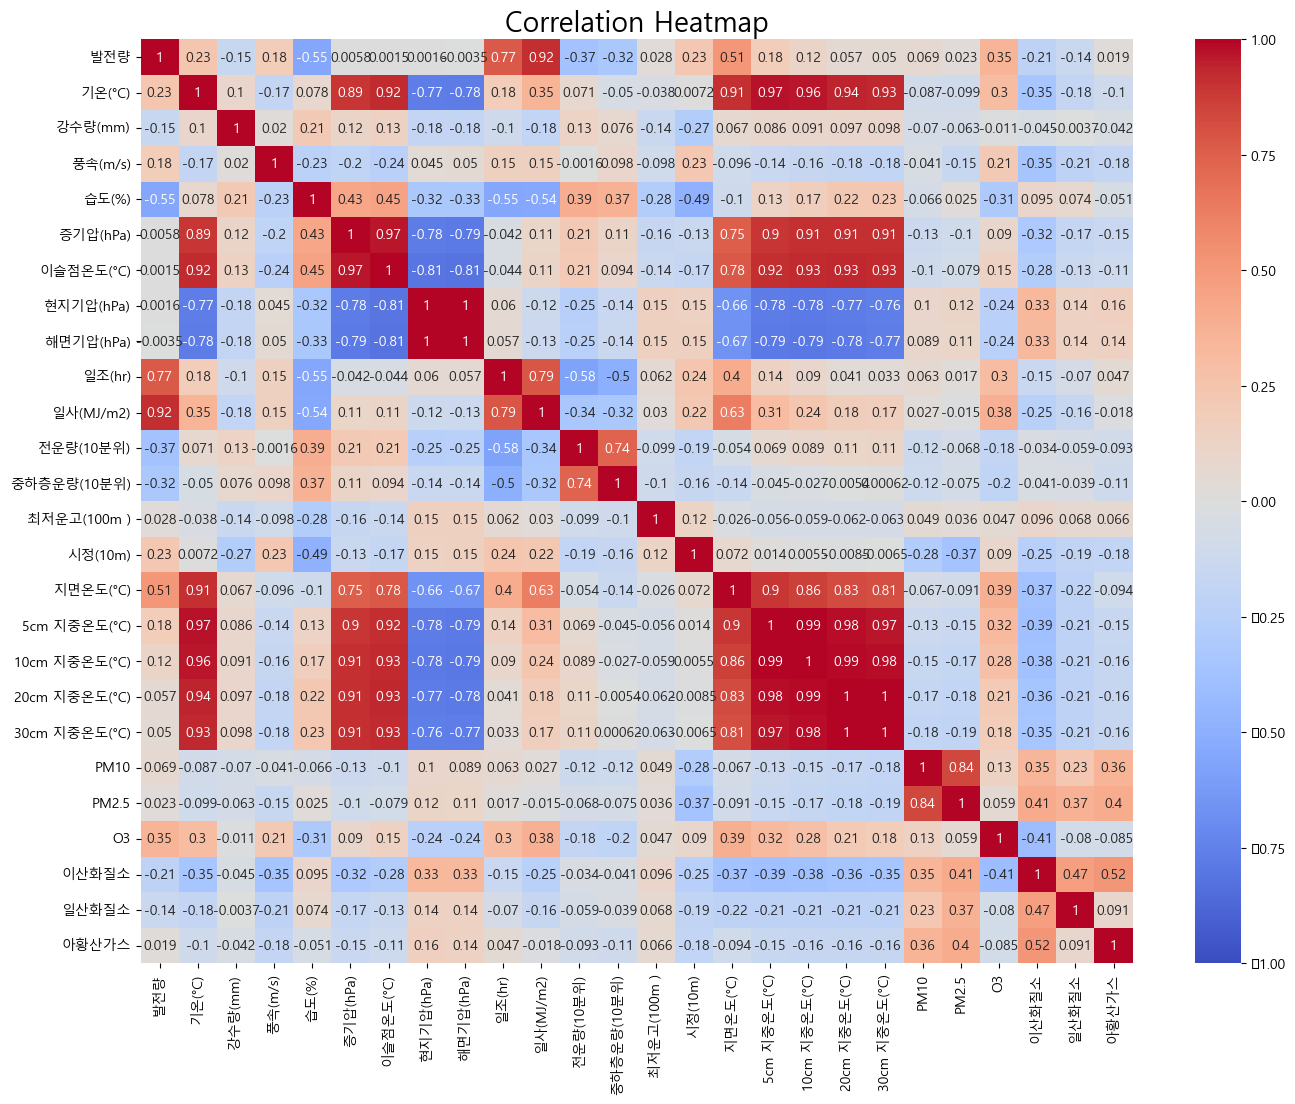

In [30]:
plt.rc('font', family='Malgun Gothic')

selected_features = ['발전량', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)',
       '전운량(10분위)', '중하층운량(10분위)',  '최저운고(100m )', '시정(10m)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)', 'PM10', 'PM2.5', 'O3', '이산화질소', '일산화질소',
       '아황산가스']
df_new_selected = df_new[selected_features]

corr = df_new_selected.corr()
plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap', fontsize=20)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

- 5cm 지중온도, 10cm 지중온도, 20cm 지중온도, 30cm 지중온도는 발전량과 딱히 상관관계도 없고 기온과 상관관계가 매우 커서 다중공선성 문제가 우려되므로 DROP 결정.

In [31]:
df_new.drop(['5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)'],axis=1,inplace=True)

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Correlation Heatmap'}>

C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


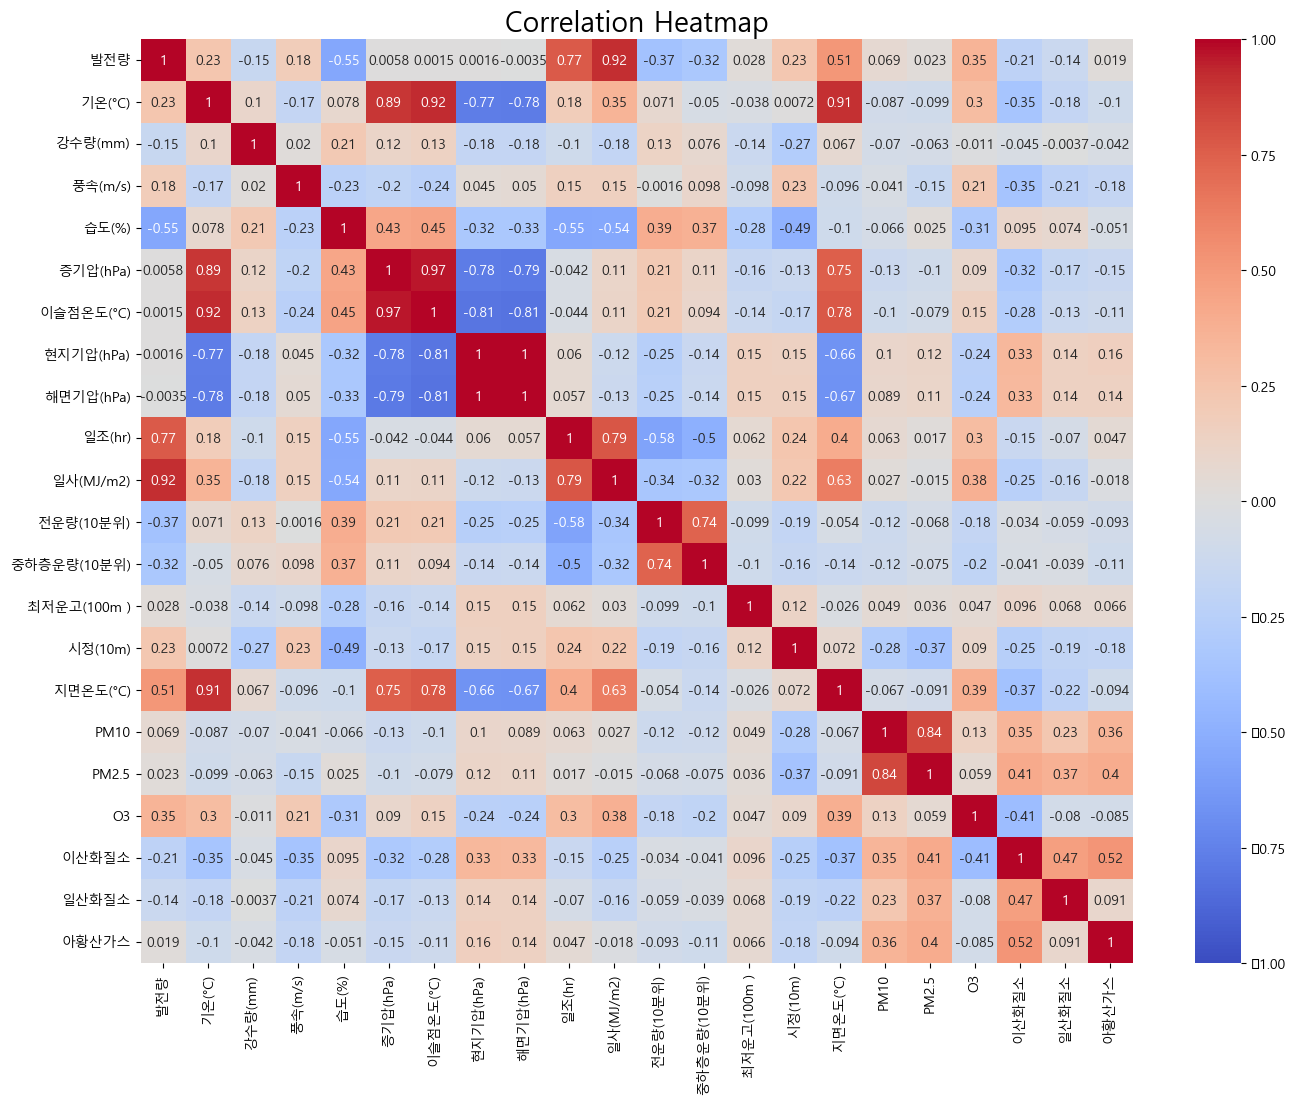

In [32]:
plt.rc('font', family='Malgun Gothic')

selected_features = ['발전량', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)',
       '전운량(10분위)', '중하층운량(10분위)',  '최저운고(100m )', '시정(10m)',
       '지면온도(°C)',  'PM10', 'PM2.5', 'O3', '이산화질소', '일산화질소',
       '아황산가스']
df_new_selected = df_new[selected_features]

corr = df_new_selected.corr()
plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap', fontsize=20)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

- 해면기압과 현지기압은 상관관계가 1이 나오므로 하나를 DROP 해야하는데 ASOS 데이터가 정확한 관측지점의 정보가 아니므로 현지기압을 DROP.

In [ ]:
df_new.drop(['현지기압(hPa)'],axis=1,inplace=True)

C:\Users\ebdl\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Correlation Heatmap'}>

C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


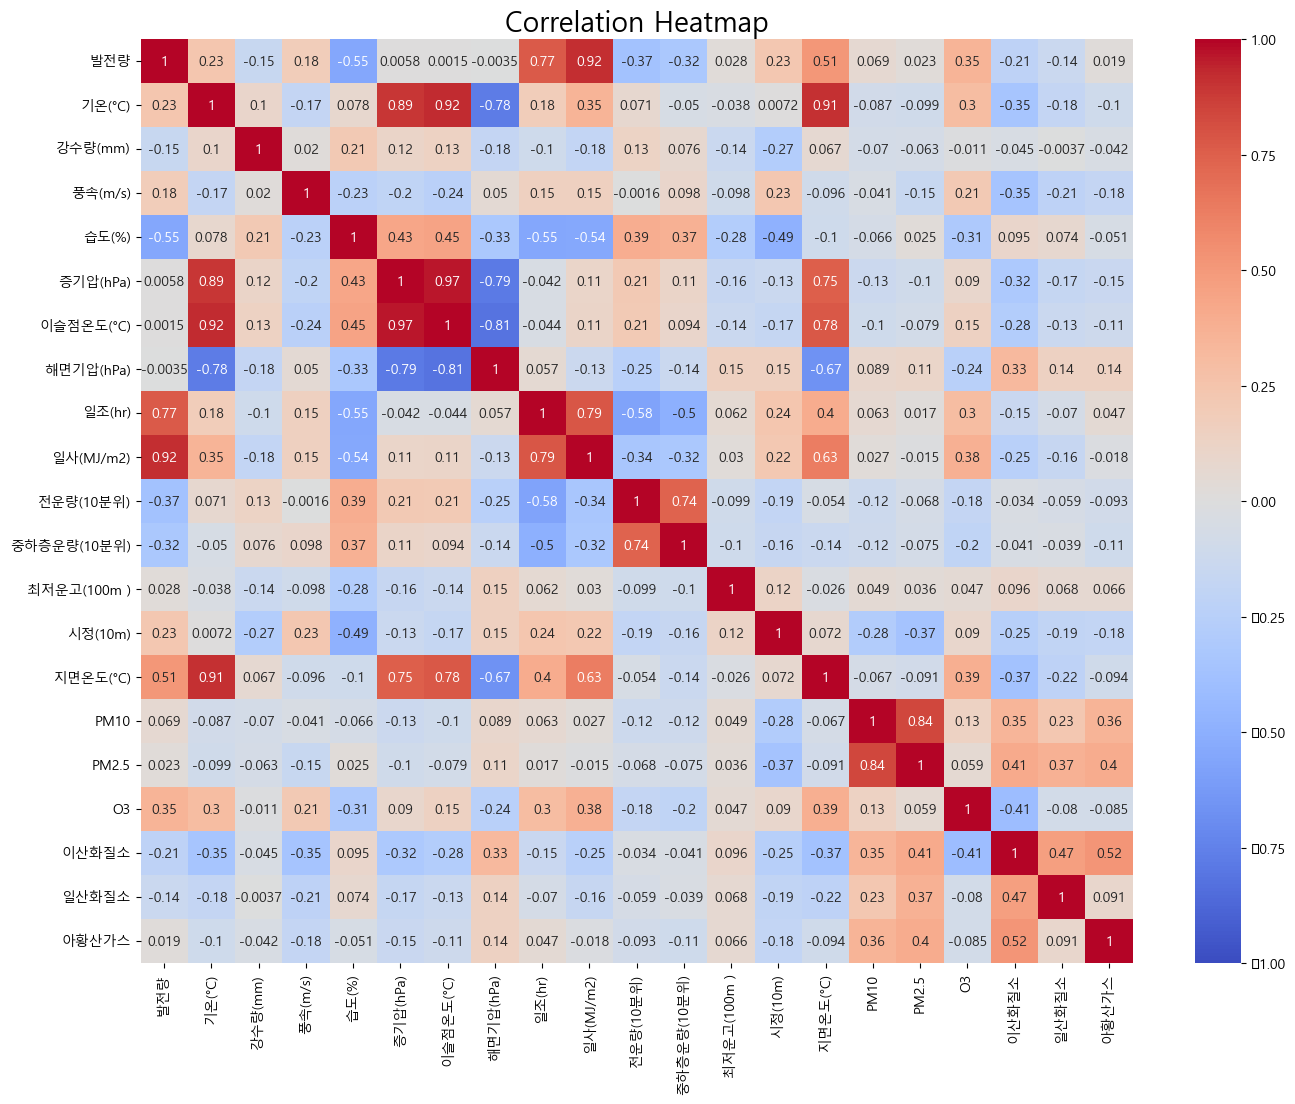

In [33]:
plt.rc('font', family='Malgun Gothic')

selected_features = ['발전량', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)',
       '이슬점온도(°C)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)',
       '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)',
       '지면온도(°C)',  'PM10', 'PM2.5', 'O3', '이산화질소', '일산화질소',
       '아황산가스']
df_new_selected = df_new[selected_features]

corr = df_new_selected.corr()
plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap', fontsize=20)
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [24]:
corr = df_new.drop('발전량', axis=1).corrwith(df_new['발전량'])
corr = corr.sort_values(ascending=False)
corr

일사(MJ/m2)        0.920927
일조(hr)           0.768298
지면온도(°C)         0.510997
O3               0.353808
기온(°C)           0.234706
시정(10m)          0.229803
풍속(m/s)          0.184482
5cm 지중온도(°C)     0.181971
풍향(16방위)_서북서     0.140235
10cm 지중온도(°C)    0.115757
풍향(16방위)_서       0.109454
풍향(16방위)_북서      0.102202
PM10             0.069416
20cm 지중온도(°C)    0.057270
풍향(16방위)_서남서     0.056921
30cm 지중온도(°C)    0.049603
최저운고(100m )      0.027980
PM2.5            0.023472
아황산가스            0.019304
풍향(16방위)_남남서     0.014751
풍향(16방위)_남       0.009115
풍향(16방위)_남서      0.008080
증기압(hPa)         0.005754
현지기압(hPa)        0.001573
이슬점온도(°C)        0.001550
해면기압(hPa)       -0.003524
풍향(16방위)_북북서    -0.015505
풍향(16방위)_북북동    -0.035110
풍향(16방위)_동남동    -0.063737
풍향(16방위)_남남동    -0.064848
풍향(16방위)_동      -0.067822
풍향(16방위)_동북동    -0.075554
풍향(16방위)_남동     -0.095407
풍향(16방위)_북      -0.098233
풍향(16방위)_북동     -0.127809
일산화질소           -0.137242
강수량(mm)         -0.154048
이산화질소           -0.213962
중하층운량(10분위) 

In [ ]:
df_new['일사(MJ/m2)'].max()

In [ ]:
corr = df_new.drop('발전량', axis=1).corrwith(df_new['발전량'])
corr = corr.sort_values(ascending=False)
corr

In [ ]:
df_new.isnull().sum()

In [ ]:
df_new.describe()

In [ ]:
df_new['최저운고(100m )'].describe()

## 지수가중이동평균

In [ ]:
N = 7
cols = [col for col in df_new.columns if col not in ['날짜','풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서','운형(운형약어)','강수량(mm)','일산화질소']]
for col in cols:
    tmp2 = df_new[col].ewm(alpha=2/(N+1), adjust=True, min_periods=1).mean()
    idx = df_new[df_new[col].isna()].index
    for k in idx:
        df_new.loc[k, col] = tmp2.loc[k]


In [ ]:
df_new.info()

In [ ]:
df_new.to_csv('지수가중이동평균.csv',encoding='cp949')

In [ ]:
df_new

# 일사, 일조와 발전량의 관계 파악

In [36]:
df_new['일사(MJ/m2)']

0        0.00
1        0.00
2        0.00
3        0.03
4        0.57
         ... 
54656    1.15
54657    0.54
54658    0.05
54659    0.00
54660    0.00
Name: 일사(MJ/m2), Length: 54661, dtype: float64

In [37]:
df_year = df_new.copy()
df_year['날짜'] = pd.to_datetime(df_new['날짜'])
df_year['연도'] = df_new['날짜'].dt.year
df_year['월'] = df_new['날짜'].dt.month
df_year = df_year.drop('날짜', axis=1)

In [38]:
df_year

,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),...,풍향(16방위)_북,풍향(16방위)_북동,풍향(16방위)_북북동,풍향(16방위)_북북서,풍향(16방위)_북서,풍향(16방위)_서,풍향(16방위)_서남서,풍향(16방위)_서북서,연도,월
0,-2.2,0.0,4.5,95.0,5.0,-2.8,1013.8,1018.7,0.0,0.00,...,0,0,0,0,0,0,0,0,2013,1
1,-1.7,NaN,5.0,95.0,5.1,-2.4,1013.8,1018.6,0.0,0.00,...,0,0,0,0,0,0,0,0,2013,1
2,-0.4,NaN,3.2,89.0,5.3,-1.9,1014.1,1018.9,0.0,0.00,...,0,0,0,0,0,0,0,0,2013,1
3,2.6,0.0,6.0,91.0,6.7,1.2,1014.8,1019.6,0.0,0.03,...,0,0,0,0,0,0,0,1,2013,1
4,4.2,NaN,5.8,82.0,6.7,1.3,1015.2,1019.9,0.7,0.57,...,0,0,0,0,0,0,1,0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54656,4.9,NaN,5.4,51.0,4.4,-4.4,1025.5,1031.1,1.0,1.15,...,0,0,0,0,1,0,0,0,2022,12
54657,4.3,NaN,5.0,53.0,4.4,-4.4,1025.4,1031.0,1.0,0.54,...,0,0,0,0,0,0,1,0,2022,12
54658,3.7,NaN,2.8,57.0,4.5,-4.0,1025.5,1031.1,0.3,0.05,...,0,0,0,0,1,0,0,0,2022,12
54659,3.2,NaN,2.3,60.0,4.6,-3.8,1026.1,1031.8,0.0,0.00,...,0,0,0,0,1,0,0,0,2022,12


In [39]:
df_year_monthly = df_year.groupby(['연도', '월'])['일사(MJ/m2)'].mean().reset_index()

<AxesSubplot:xlabel='월', ylabel='일사(MJ/m2)'>

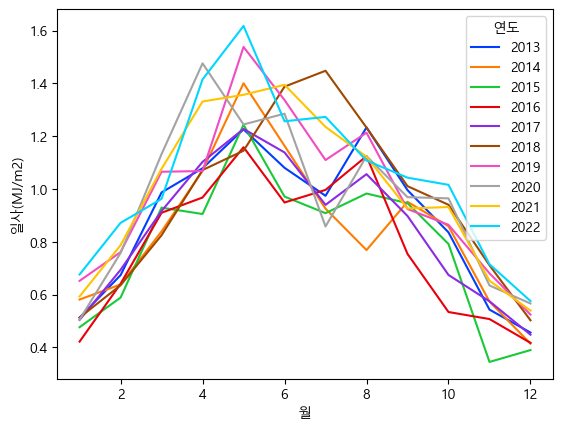

In [40]:
sns.lineplot(x='월', y='일사(MJ/m2)', hue='연도', data=df_year_monthly,palette='bright')

In [41]:
yearly_sum = df_year.groupby('연도').sum()

In [42]:
yearly_mean = df_year.groupby('연도').mean()

In [43]:
yearly_sum

,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),...,풍향(16방위)_동북동,풍향(16방위)_북,풍향(16방위)_북동,풍향(16방위)_북북동,풍향(16방위)_북북서,풍향(16방위)_북서,풍향(16방위)_서,풍향(16방위)_서남서,풍향(16방위)_서북서,월
연도,,,,,,,,,,,,,,,,,,,,,
2013,80844.400000,629.5,20207.700000,421706.439868,84516.500000,56920.600000,5.539156e+06,5563980.7,2354.684664,4840.67,...,74.0,276.0,255.0,651.0,320.0,381.0,95.0,230.0,268.0,35730
2014,81470.300000,677.4,18001.100000,438130.416959,85862.352031,61051.943460,5.540483e+06,5565311.1,2142.205528,4649.64,...,159.0,131.0,294.0,593.0,381.0,528.0,104.0,202.0,337.0,35730
2015,84359.000000,673.2,18435.400000,411389.669609,81092.600000,58381.100000,5.540685e+06,5565439.7,2109.256097,4332.64,...,129.0,114.0,273.0,516.0,410.0,499.0,104.0,204.0,304.0,35730
2016,86182.669577,937.7,18889.100000,428975.000000,90750.893243,63356.908936,5.556320e+06,5581119.0,2157.800000,4294.47,...,145.0,100.0,332.0,651.0,443.0,474.0,97.0,184.0,299.0,35760
2017,83430.600000,459.5,20979.000000,419316.000000,86206.400000,58506.800000,5.543298e+06,5568089.4,2432.000000,4643.26,...,119.0,57.0,196.0,473.0,484.0,424.0,140.0,275.0,395.0,35730
2018,84185.800000,750.6,20440.850056,393193.929723,79783.141816,53839.343979,5.542348e+06,5567128.5,2397.500000,5219.54,...,149.0,60.0,303.0,795.0,408.0,398.0,158.0,148.0,189.0,35730
2019,83447.356931,883.2,20808.600000,373148.000000,75311.700000,49075.400000,5.539995e+06,5564759.3,2390.700000,5362.86,...,137.0,68.0,282.0,874.0,519.0,341.0,166.0,149.0,172.0,35730
2020,80911.000000,820.6,21544.629822,385560.000000,76050.367866,49092.457492,5.553135e+06,5581333.2,2318.600000,5266.86,...,114.0,56.0,201.0,440.0,645.0,325.0,294.0,186.0,288.0,35760
2021,87197.600000,675.4,20126.500000,380814.000000,79646.500000,54439.400000,5.531403e+06,5560441.2,2438.900000,5451.82,...,163.0,45.0,188.0,359.0,563.0,297.0,278.0,189.0,306.0,35670


In [44]:
yearly=df_year.groupby('연도')

In [45]:
yearly.get_group(2021)['기온(°C)'].max()

33.3

###  강수량 결측치파악

In [46]:
rainfall = df_year['강수량(mm)']
year = df_year['연도']

In [47]:
# 연도별 결측치 개수 파악
missing_data = pd.DataFrame({'Year': year, 'Rainfall': rainfall.isnull()})
missing_data = missing_data.groupby('Year').sum()

In [48]:
missing_data

,Rainfall
Year,
2013,4996
2014,4834
2015,4952
2016,4898
2017,5008
2018,4979
2019,4961
2020,4917
2021,4926


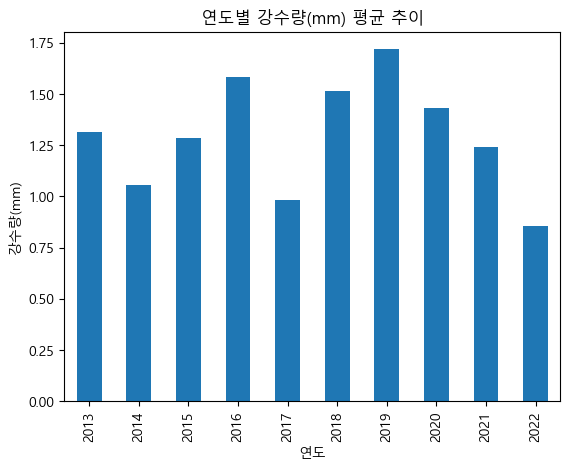

In [49]:
import matplotlib.pyplot as plt

# 막대그래프로 시각화
yearly_mean['강수량(mm)'].plot(kind='bar')
plt.title('연도별 강수량(mm) 평균 추이')
plt.xlabel('연도')
plt.ylabel('강수량(mm)')
plt.show()

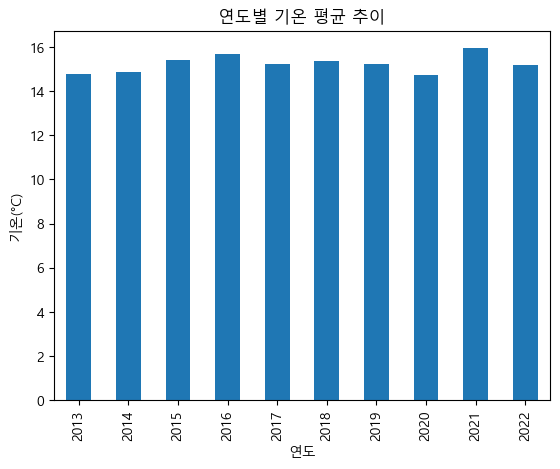

In [50]:
import matplotlib.pyplot as plt

# 막대그래프로 시각화
yearly_mean['기온(°C)'].plot(kind='bar')
plt.title('연도별 기온 평균 추이')
plt.xlabel('연도')
plt.ylabel('기온(°C)')
plt.show()

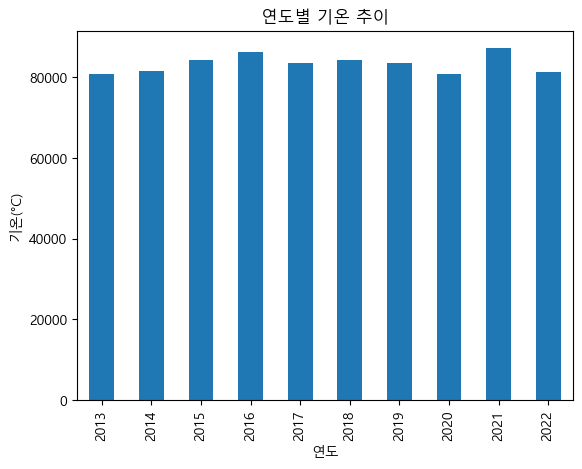

In [51]:
# 막대그래프로 시각화
yearly_sum['기온(°C)'].plot(kind='bar')
plt.title('연도별 기온 추이')
plt.xlabel('연도')
plt.ylabel('기온(°C)')
plt.show()

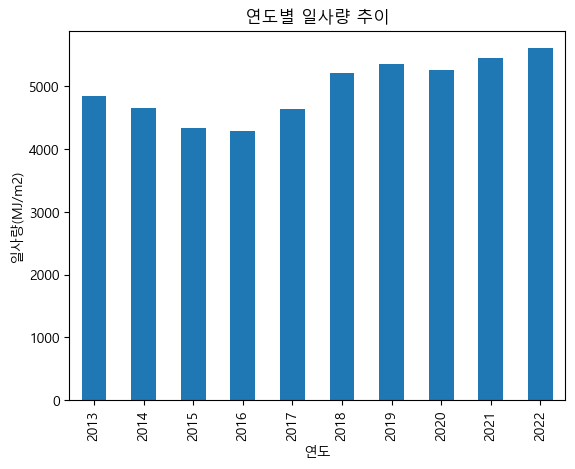

In [52]:
# 막대그래프로 시각화
yearly_sum['일사(MJ/m2)'].plot(kind='bar')
plt.title('연도별 일사량 추이')
plt.xlabel('연도')
plt.ylabel('일사량(MJ/m2)')
plt.show()

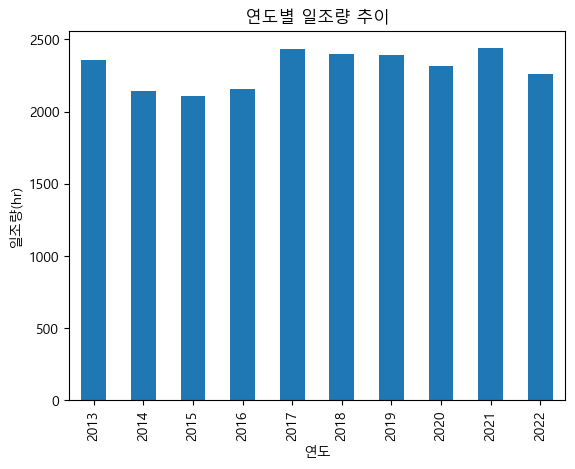

In [53]:
# 막대그래프로 시각화
yearly_sum['일조(hr)'].plot(kind='bar')
plt.title('연도별 일조량 추이')
plt.xlabel('연도')
plt.ylabel('일조량(hr)')
plt.show()

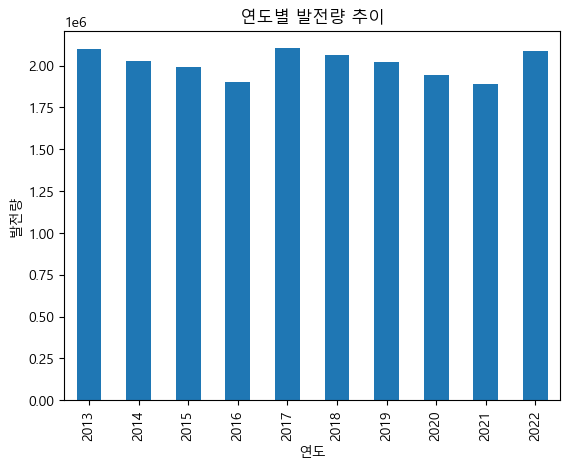

In [54]:
# 막대그래프로 시각화
yearly_sum['발전량'].plot(kind='bar')
plt.title('연도별 발전량 추이')
plt.xlabel('연도')
plt.ylabel('발전량')
plt.show()

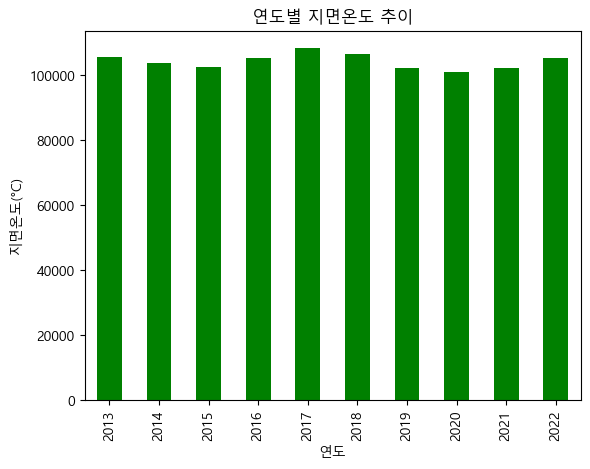

In [55]:
# 막대그래프로 시각화
yearly_sum['지면온도(°C)'].plot(kind='bar',color='green')
plt.title('연도별 지면온도 추이')
plt.xlabel('연도')
plt.ylabel('지면온도(°C)')
plt.show()

In [56]:
df_new.columns

Index(['날짜', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)',
       '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)', '발전량', 'PM10',
       'PM2.5', 'O3', '이산화질소', '일산화질소', '아황산가스', '풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서'],
      dtype='object')

In [57]:
df_new.isnull().sum()

날짜                  0
기온(°C)              0
강수량(mm)         49448
풍속(m/s)             0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
일조(hr)              0
일사(MJ/m2)           0
전운량(10분위)           0
중하층운량(10분위)         0
최저운고(100m )         0
시정(10m)             0
지면온도(°C)            0
발전량                 0
PM10                0
PM2.5               0
O3                  0
이산화질소               0
일산화질소           45058
아황산가스               0
풍향(16방위)_남          0
풍향(16방위)_남남동        0
풍향(16방위)_남남서        0
풍향(16방위)_남동         0
풍향(16방위)_남서         0
풍향(16방위)_동          0
풍향(16방위)_동남동        0
풍향(16방위)_동북동        0
풍향(16방위)_북          0
풍향(16방위)_북동         0
풍향(16방위)_북북동        0
풍향(16방위)_북북서        0
풍향(16방위)_북서         0
풍향(16방위)_서          0
풍향(16방위)_서남서        0
풍향(16방위)_서북서        0
dtype: int64

In [58]:
df_new['일조(hr)'].fillna(0, inplace=True)
df_new['일사(MJ/m2)'].fillna(0, inplace=True)

In [65]:
df_pca = df_new.drop(['풍향(16방위)_남', '풍향(16방위)_남남동',
       '풍향(16방위)_남남서', '풍향(16방위)_남동', '풍향(16방위)_남서', '풍향(16방위)_동',
       '풍향(16방위)_동남동', '풍향(16방위)_동북동', '풍향(16방위)_북', '풍향(16방위)_북동',
       '풍향(16방위)_북북동', '풍향(16방위)_북북서', '풍향(16방위)_북서', '풍향(16방위)_서',
       '풍향(16방위)_서남서', '풍향(16방위)_서북서','날짜','강수량(mm)','일산화질소'],axis=1)

In [66]:
df_pca

,기온(°C),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),발전량,PM10,PM2.5,O3,이산화질소,아황산가스
0,-2.2,4.5,95.0,5.0,-2.8,1013.8,1018.7,0.0,0.00,10.0,6.0,10.000000,1500.0,0.8,0.00,26.0,23.0,0.007,0.006,0.004
1,-1.7,5.0,95.0,5.1,-2.4,1013.8,1018.6,0.0,0.00,10.0,6.0,10.000000,1500.0,0.7,0.00,26.0,23.0,0.006,0.010,0.004
2,-0.4,3.2,89.0,5.3,-1.9,1014.1,1018.9,0.0,0.00,10.0,7.0,9.000000,1500.0,0.9,0.00,30.0,24.0,0.006,0.011,0.004
3,2.6,6.0,91.0,6.7,1.2,1014.8,1019.6,0.0,0.03,10.0,7.0,8.000000,1300.0,0.8,20.16,28.0,23.0,0.005,0.010,0.004
4,4.2,5.8,82.0,6.7,1.3,1015.2,1019.9,0.7,0.57,7.0,7.0,9.000000,1300.0,1.1,106.80,29.0,27.0,0.007,0.006,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54656,4.9,5.4,51.0,4.4,-4.4,1025.5,1031.1,1.0,1.15,0.0,0.0,11.633007,4224.0,6.1,428.16,28.0,18.0,0.039,0.009,0.002
54657,4.3,5.0,53.0,4.4,-4.4,1025.4,1031.0,1.0,0.54,0.0,0.0,11.633007,4290.0,3.5,53.64,26.0,20.0,0.035,0.013,0.002
54658,3.7,2.8,57.0,4.5,-4.0,1025.5,1031.1,0.3,0.05,0.0,0.0,11.633007,3775.0,1.8,5.76,32.0,19.0,0.029,0.018,0.002
54659,3.2,2.3,60.0,4.6,-3.8,1026.1,1031.8,0.0,0.00,0.0,0.0,11.633007,3669.0,0.9,0.00,29.0,16.0,0.027,0.016,0.003


In [67]:
df_pca.columns

Index(['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '최저운고(100m )', '시정(10m)', '지면온도(°C)', '발전량', 'PM10', 'PM2.5', 'O3',
       '이산화질소', '아황산가스'],
      dtype='object')

# Clustering

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=df_pca.columns)

In [69]:
df_scaled.columns

Index(['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '최저운고(100m )', '시정(10m)', '지면온도(°C)', '발전량', 'PM10', 'PM2.5', 'O3',
       '이산화질소', '아황산가스'],
      dtype='object')

In [70]:
features = ['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '해면기압(hPa)',
       '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )',
       '시정(10m)', '지면온도(°C)', '발전량', 'PM10', 'PM2.5', 'O3', '이산화질소', '아황산가스']
X = df_scaled[features]

In [71]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

NameError: name 'KMeans' is not defined

In [ ]:
df_scaled['cluster'] = kmeans.labels_

In [ ]:
# 클러스터별로 데이터 분할
cluster0 = df_scaled[df_scaled['cluster'] == 0]
cluster1 = df_scaled[df_scaled['cluster'] == 1]
cluster2 = df_scaled[df_scaled['cluster'] == 2]
cluster3 = df_scaled[df_scaled['cluster'] == 3]

In [ ]:
# 클러스터별 데이터 시각화
plt.scatter(cluster0['feature1'], cluster0['feature2'], color='red')
plt.scatter(cluster1['feature1'], cluster1['feature2'], color='blue')
plt.scatter(cluster2['feature1'], cluster2['feature2'], color='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Visualization')

plt.show()


# PCA

## 2차원으로 차원축소

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# 표준화
scaler = StandardScaler()
df_std = scaler.fit_transform(df_pca)

# PCA 모델링
pca = PCA(n_components=2)
pca.fit(df_std)

# 주성분(PC) 산출
pcs = pca.transform(df_std)
pc_df = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
pcs_scaled = min_max_scaler.fit_transform(pc_df)

# 결과 출력
pcs_scaled


array([[-0.44564168, -0.65812095],
       [-0.45833645, -0.66651085],
       [-0.45515201, -0.67743671],
       ...,
       [-0.65721917,  0.0669524 ],
       [-0.67564711, -0.01838028],
       [-0.70773782, -0.10256855]])

In [73]:
pcs_scaled = pd.DataFrame(data=pcs_scaled, columns=['PC1', 'PC2'])

In [74]:
pcs_scaled

,PC1,PC2
0,-0.445642,-0.658121
1,-0.458336,-0.666511
2,-0.455152,-0.677437
3,-0.412774,-0.669941
4,-0.377808,-0.367977
...,...,...
54656,-0.522264,0.512590
54657,-0.591519,0.349357
54658,-0.657219,0.066952
54659,-0.675647,-0.018380


C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


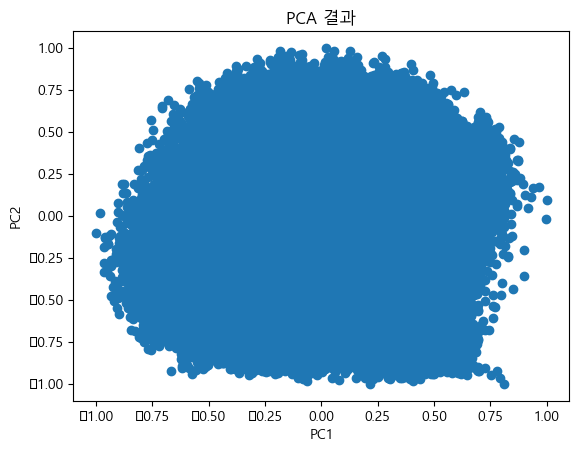

In [75]:
plt.scatter(pcs_scaled['PC1'], pcs_scaled['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 결과')


plt.show()

In [76]:
from matplotlib import font_manager, rc

# 폰트 경로와 이름을 지정
font_path = 'C:/Windows/Fonts/malgun.ttf' # 나눔글꼴 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 폰트 설정
rc('font', family=font_name)

## 주성분을 이용한 feature importance 시각화


C:\Users\ebdl\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


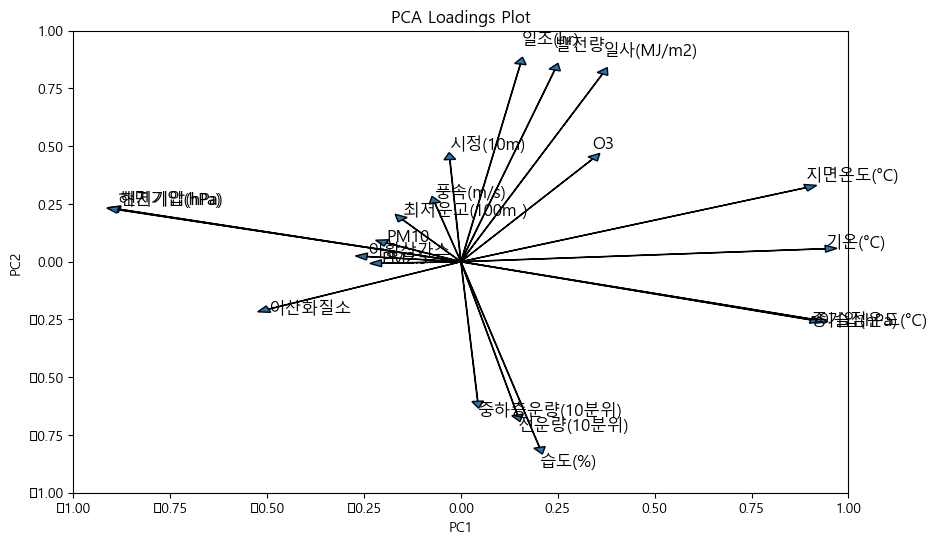

In [77]:
# 주성분을 이용한 feature importance 시각화
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = df_pca.columns.values

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.03, head_length=0.03)
    ax.annotate(feature, (loadings[i, 0], loadings[i, 1]),xytext=(loadings[i, 0], loadings[i, 1] * 1.1), fontsize=12)
    
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA Loadings Plot")

plt.show()

In [ ]:
features = ['PC1', 'PC2']
X = pcs_scaled[features]

k=4

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [ ]:
# 클러스터링 결과 데이터프레임에 추가
pcs_scaled['cluster'] = kmeans.labels_

In [ ]:
# 클러스터별로 데이터 분할
cluster0 = pcs_scaled[pcs_scaled['cluster'] == 0]
cluster1 = pcs_scaled[pcs_scaled['cluster'] == 1]
cluster2 = pcs_scaled[pcs_scaled['cluster'] == 2]
cluster3 = pcs_scaled[pcs_scaled['cluster'] == 3]

In [ ]:
# 클러스터별 데이터 시각화
plt.scatter(cluster0['PC1'], cluster0['PC2'], color='red')
plt.scatter(cluster1['PC1'], cluster1['PC2'], color='blue')
plt.scatter(cluster2['PC1'], cluster2['PC2'], color='green')
plt.scatter(cluster3['PC1'], cluster3['PC2'], color='orange')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')

plt.show()


k=5

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [ ]:
pcs_scaled['cluster'] = kmeans.labels_

In [ ]:
# 클러스터별로 데이터 분할
cluster0 = pcs_scaled[pcs_scaled['cluster'] == 0]
cluster1 = pcs_scaled[pcs_scaled['cluster'] == 1]
cluster2 = pcs_scaled[pcs_scaled['cluster'] == 2]
cluster3 = pcs_scaled[pcs_scaled['cluster'] == 3]
cluster4 = pcs_scaled[pcs_scaled['cluster'] == 4]

In [ ]:
# 클러스터별 데이터 시각화
plt.scatter(cluster0['PC1'], cluster0['PC2'], color='red')
plt.scatter(cluster1['PC1'], cluster1['PC2'], color='blue')
plt.scatter(cluster2['PC1'], cluster2['PC2'], color='green')
plt.scatter(cluster3['PC1'], cluster3['PC2'], color='orange')
plt.scatter(cluster4['PC1'], cluster4['PC2'], color='pink')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')

plt.show()

k=3

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
pcs_scaled['cluster'] = kmeans.labels_
# 클러스터별로 데이터 분할
cluster0 = pcs_scaled[pcs_scaled['cluster'] == 0]
cluster1 = pcs_scaled[pcs_scaled['cluster'] == 1]
cluster2 = pcs_scaled[pcs_scaled['cluster'] == 2]

In [ ]:
# 클러스터별 데이터 시각화
plt.scatter(cluster0['PC1'], cluster0['PC2'], color='red')
plt.scatter(cluster1['PC1'], cluster1['PC2'], color='blue')
plt.scatter(cluster2['PC1'], cluster2['PC2'], color='green')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization')

plt.show()